In [15]:
### Import Functions
from DirectFunctions import import_fx_data, direct_daily_rets, get_pairs, compute_hedge_ratio, calculate_hedged_unhedged, plot_hedged_returns, performance_metrics
import pandas as pd


In [16]:
### Call Function to Load in Rate Data
all_forex_pairs = [
    'EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCHF=X', 'AUDUSD=X', 'NZDUSD=X',
    'USDCAD=X', 'EURGBP=X', 'EURJPY=X', 'EURCHF=X', 'EURAUD=X', 'EURNZD=X',
    'EURCAD=X', 'GBPAUD=X', 'GBPJPY=X', 'GBPCHF=X', 'AUDJPY=X', 'AUDCHF=X',
    'AUDNZD=X', 'NZDJPY=X', 'NZDCHF=X', 'CADJPY=X', 'CADCHF=X', 'CHFJPY=X'
]
start_date = '2023-07-01'
forex_data = import_fx_data(all_forex_pairs, start_date)
forex_data.tail()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Date,EURUSD=X,GBPUSD=X,USDJPY=X,USDCHF=X,AUDUSD=X,NZDUSD=X,USDCAD=X,EURGBP=X,EURJPY=X,...,GBPJPY=X,GBPCHF=X,AUDJPY=X,AUDCHF=X,AUDNZD=X,NZDJPY=X,NZDCHF=X,CADJPY=X,CADCHF=X,CHFJPY=X
257,2024-06-26,1.070962,1.268400,159.686005,0.89520,0.664480,0.611909,1.36611,0.84429,171.009995,...,202.539993,1.13554,106.103996,0.594949,1.08598,97.648003,0.54753,116.887001,0.65529,178.347000
258,2024-06-27,1.068011,1.262180,160.621002,0.89670,0.664478,0.608028,1.37045,0.84613,171.535004,...,202.716003,1.13210,106.719002,0.595918,1.09290,97.633003,0.54510,117.171997,0.65410,179.044006
259,2024-06-28,1.070847,1.264574,160.686996,0.89852,0.665060,0.608469,1.36993,0.84678,172.065002,...,203.188995,1.13616,106.862999,0.597560,1.09300,97.760002,0.54662,117.293999,0.65585,178.775589
260,2024-07-01,1.073526,1.264862,160.906998,0.90020,0.667401,0.609920,1.36727,0.84871,172.729996,...,203.479996,1.13866,107.370003,0.600873,1.09420,98.125999,0.54899,117.679001,0.65839,178.724762
261,2024-07-02,1.073768,1.264095,161.619995,0.90342,0.665070,0.605730,1.37404,0.84919,173.509003,...,204.309006,NaN,107.478996,0.600730,1.09772,97.897003,0.54722,NaN,0.65750,178.882004


In [17]:
### Call Function to Calculate Daily Returns
daily_returns = direct_daily_rets(forex_data)
print(daily_returns.head())


        Date  EURUSD=X  GBPUSD=X  USDJPY=X  USDCHF=X  AUDUSD=X  NZDUSD=X  \
0 2023-07-04  0.000513 -0.000025  0.001288  0.000894  0.002369  0.003884   
1 2023-07-05 -0.002580  0.001946 -0.001231  0.000938  0.002788  0.006836   
2 2023-07-06 -0.002606 -0.001029  0.000575  0.002097 -0.005349 -0.003404   
3 2023-07-07  0.003137  0.003007 -0.003723 -0.003606 -0.004282 -0.002182   
4 2023-07-10  0.007262  0.007549 -0.012101 -0.007126  0.009049  0.006876   

   USDCAD=X  EURGBP=X  EURJPY=X  ...  GBPJPY=X  GBPCHF=X  AUDJPY=X  AUDCHF=X  \
0 -0.000151  0.000547  0.001791  ...  0.001162  0.000704  0.003703  0.003222   
1 -0.001849 -0.005060 -0.004018  ...  0.000654  0.002718  0.001555  0.003810   
2  0.004719 -0.001146 -0.001890  ... -0.000436  0.001184 -0.005070 -0.003812   
3  0.005984  0.000234 -0.000529  ... -0.000648 -0.000675 -0.007707 -0.007560   
4 -0.006539 -0.000234 -0.005167  ... -0.004591  0.000491 -0.003186  0.001904   

   AUDNZD=X  NZDJPY=X  NZDCHF=X  CADJPY=X  CADCHF=X  CHFJPY=X 

In [18]:
### Function Call
pair_combos_list = get_pairs(all_forex_pairs)
pair_combos_list


[['EURUSD=X', 'GBPUSD=X'],
 ['EURUSD=X', 'USDJPY=X'],
 ['EURUSD=X', 'USDCHF=X'],
 ['EURUSD=X', 'AUDUSD=X'],
 ['EURUSD=X', 'NZDUSD=X'],
 ['EURUSD=X', 'USDCAD=X'],
 ['EURUSD=X', 'EURGBP=X'],
 ['EURUSD=X', 'EURJPY=X'],
 ['EURUSD=X', 'EURCHF=X'],
 ['EURUSD=X', 'EURAUD=X'],
 ['EURUSD=X', 'EURNZD=X'],
 ['EURUSD=X', 'EURCAD=X'],
 ['EURUSD=X', 'GBPAUD=X'],
 ['EURUSD=X', 'GBPJPY=X'],
 ['EURUSD=X', 'GBPCHF=X'],
 ['EURUSD=X', 'AUDJPY=X'],
 ['EURUSD=X', 'AUDCHF=X'],
 ['EURUSD=X', 'AUDNZD=X'],
 ['EURUSD=X', 'NZDJPY=X'],
 ['EURUSD=X', 'NZDCHF=X'],
 ['EURUSD=X', 'CADJPY=X'],
 ['EURUSD=X', 'CADCHF=X'],
 ['EURUSD=X', 'CHFJPY=X'],
 ['GBPUSD=X', 'USDJPY=X'],
 ['GBPUSD=X', 'USDCHF=X'],
 ['GBPUSD=X', 'AUDUSD=X'],
 ['GBPUSD=X', 'NZDUSD=X'],
 ['GBPUSD=X', 'USDCAD=X'],
 ['GBPUSD=X', 'EURGBP=X'],
 ['GBPUSD=X', 'EURJPY=X'],
 ['GBPUSD=X', 'EURCHF=X'],
 ['GBPUSD=X', 'EURAUD=X'],
 ['GBPUSD=X', 'EURNZD=X'],
 ['GBPUSD=X', 'EURCAD=X'],
 ['GBPUSD=X', 'GBPAUD=X'],
 ['GBPUSD=X', 'GBPJPY=X'],
 ['GBPUSD=X', 'GBPCHF=X'],
 

In [19]:
### Append Long Position, Short Position, Hedged returns, and Unhedged Returns Columns
# Create an empty DataFrame to store hedge ratios
hedge_ratios_df = pd.DataFrame(columns = ['Pair1', 'Pair2', 'Hedge Ratio', 'Long Position', 'Short Position', 'Hedged Returns', 'Unhedged Returns'])
long_pos = 1000
# Loop over pair combinations to compute hedge ratio and returns
for pairing in pair_combos_list:
    try:
        hedge_ratio = compute_hedge_ratio(pairing, daily_returns)
        short_pos, hedged_cumulative_rets, unhedged_cumulative_rets = calculate_hedged_unhedged(long_pos, pairing, daily_returns, hedge_ratio)
        new_row = pd.DataFrame({
            'Pair1': [pairing[0]], 
            'Pair2': [pairing[1]], 
            'Hedge Ratio': [hedge_ratio], 
            'Long Position': [long_pos], 
            'Short Position': [short_pos],
            'Hedged Returns': [hedged_cumulative_rets.iloc[-1]], 
            'Unhedged Returns': [unhedged_cumulative_rets.iloc[-1]]
        })
        hedge_ratios_df = pd.concat([hedge_ratios_df, new_row], ignore_index=True)
    except Exception as e:
        print(f"Error computing hedge ratio for {pairing}: {e}")

# Display the DataFrame
print(hedge_ratios_df.tail())


        Pair1     Pair2  Hedge Ratio Long Position  Short Position  \
271  NZDCHF=X  CADCHF=X     0.462682          1000     -462.681810   
272  NZDCHF=X  CHFJPY=X    -0.425349          1000      425.348780   
273  CADJPY=X  CADCHF=X     0.299906          1000     -299.905733   
274  CADJPY=X  CHFJPY=X     0.698684          1000     -698.683573   
275  CADCHF=X  CHFJPY=X    -0.444424          1000      444.423923   

     Hedged Returns  Unhedged Returns  
271     1009.581092        997.102798  
272     1043.776035        997.102798  
273     1088.611390       1079.940885  
274     1004.072101       1079.940885  
275     1020.634804        973.295523  


In [20]:
### Filter for Most Profitable Hedged Pairing
# Sort the DataFrame by the 'Hedged Returns' column in descending order
most_profit_hedged = hedge_ratios_df.sort_values(by = 'Hedged Returns', ascending = False).head(1)
#print(most_profit_hedged)

### Display Results
pair1 = most_profit_hedged.iloc[0]['Pair1']
pair2 = most_profit_hedged.iloc[0]['Pair2']
hedge_ratio = most_profit_hedged.iloc[0]['Hedge Ratio']
long_position = most_profit_hedged.iloc[0]['Long Position']
short_position = most_profit_hedged.iloc[0]['Short Position']
hedged_returns = most_profit_hedged.iloc[0]['Hedged Returns']
unhedged_returns = most_profit_hedged.iloc[0]['Unhedged Returns']

print(f"Most Profitable Pairings: {pair1} and {pair2}")
print(f"Hedge Ratio: {hedge_ratio:.6f}")
print(f"Long Position: {long_position}")
print(f"Short Position: {short_position:.6f}")
print("\nReturns:")
print(f"Hedged Returns: {hedged_returns:.6f}")
print(f"Unhedged Returns: {unhedged_returns:.6f}")


Most Profitable Pairings: USDJPY=X and EURAUD=X
Hedge Ratio: 0.264086
Long Position: 1000
Short Position: -264.085810

Returns:
Hedged Returns: 1124.413270
Unhedged Returns: 1119.267585


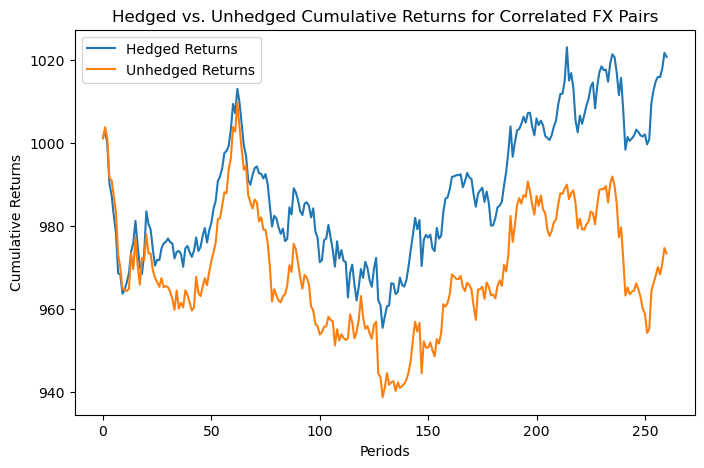

In [21]:
### Plot Hedged vs. Unhedged Returns
plot_hedged_returns(hedged_cumulative_rets, unhedged_cumulative_rets)


In [22]:
### Performance Metrics Function Return
performance_metrics(long_pos, hedged_cumulative_rets, unhedged_cumulative_rets, daily_returns)

Metric                                  Hedged        Unhedged
Total Returns                          20.6348        -26.7045
Annualized Returns                     18.4587             nan
Mean Return                           988.0189        969.2321
Standard Deviation                     16.2359         14.4477
Sharpe Ratio                          966.0255       1064.9513

The Sharpe ratio measures the risk-adjusted return of an investment.
In this instance, the hedged strategy has a Sharpe ratio of 966.0255,
which means for every unit of risk, the hedged portfolio is generating 966.0255 units of return above the risk-free rate.
The unhedged strategy has a Sharpe ratio of 1064.9513,
indicating that for every unit of risk, the unhedged portfolio is generating 1064.9513 units of return above the risk-free rate.
A higher Sharpe ratio typically indicates a more favorable risk-adjusted return.
